# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 24 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|



## Load the data

In [1]:
# Read the data using pandas module.
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/ipl_data.csv', parse_dates=['date'])
data.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,...,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN


## There are matches being played all around the world. Find the list of unique cities where matches are being played throughout the world.

In [3]:
print('Cities these matches were played at: \n', data['city'].unique())

Cities these matches were played at: 
 ['East London' 'Port Elizabeth' 'Centurion' 'neutral_venue' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi' 'Chandigarh' 'Hyderabad' 'Ranchi' 'Mumbai'
 'Bangalore' 'Dharamsala' 'Pune' 'Rajkot' 'Durban' 'Cuttack' 'Cape Town'
 'Ahmedabad' 'Johannesburg' 'Visakhapatnam' 'Abu Dhabi' 'Raipur' 'Kochi'
 'Kimberley' 'Nagpur' 'Bloemfontein' 'Indore' 'Kanpur']


In [4]:
data.loc[data['city'] == 'neutral_venue', 'venue'].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
      dtype=object)

## Find columns containing null values if any.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   match_code       136522 non-null  int64         
 1   date             136522 non-null  datetime64[ns]
 2   city             136522 non-null  object        
 3   venue            136522 non-null  object        
 4   team1            136522 non-null  object        
 5   team2            136522 non-null  object        
 6   toss_winner      136522 non-null  object        
 7   toss_decision    136522 non-null  object        
 8   winner           134704 non-null  object        
 9   win_type         134704 non-null  object        
 10  win_margin       134704 non-null  float64       
 11  inning           136522 non-null  int64         
 12  delivery         136522 non-null  float64       
 13  batting_team     136522 non-null  object        
 14  batsman          136

In [6]:
null_cols = data.isnull().sum()
print('List of columns where null values are present: \n', null_cols[null_cols > 0].index.tolist())

List of columns where null values are present: 
 ['winner', 'win_type', 'win_margin', 'extras_type', 'player_out', 'wicket_kind', 'wicket_fielders']


### Why we have null values for winner column?

In [7]:
data.loc[data['winner'].isnull(), 'match_code'].unique()

array([392190, 598004, 829813, 829741, 419121, 501265, 729315, 829763,
       598017], dtype=int64)

## Matches are played throughout the world in different countries but they may or may not have multiple venues(stadiums where matches are played).

In [8]:
multi_stadium = data.groupby('city')['venue'].nunique().nlargest(5)
multi_stadium

city
Mumbai           3
Chandigarh       2
Pune             2
neutral_venue    2
Abu Dhabi        1
Name: venue, dtype: int64

In [9]:
#data[data['city'].isin(multi_stadium)].groupby('city').unique()

## Find the top 5 venues where the most matches are played.

In [10]:
# Top 5 venues where most ball were bowled!
data['venue'].value_counts().nlargest(5)

M Chinnaswamy Stadium              13368
Eden Gardens                       12578
Feroz Shah Kotla                   12274
MA Chidambaram Stadium, Chepauk    11751
Wankhede Stadium                   11688
Name: venue, dtype: int64

In [11]:
# Top 5 venues where most matches were played!
data.groupby('venue')['match_code'].nunique().nlargest(5)

venue
M Chinnaswamy Stadium              58
Eden Gardens                       54
Feroz Shah Kotla                   53
Wankhede Stadium                   49
MA Chidambaram Stadium, Chepauk    48
Name: match_code, dtype: int64

## Find out how the runs were scored that is the runs count frequency table( number of singles, doubles, boundaries, sixes etc were scored).

In [12]:
data['runs'].value_counts(sort=False)

0    55870
1    50087
2     8835
3      473
4    15409
5       42
6     5806
Name: runs, dtype: int64

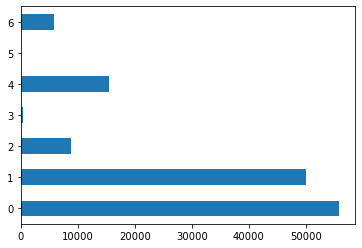

In [13]:
data['runs'].value_counts(sort=False).plot.barh();

### Is there difference in runs frequency w.r.t. innings?

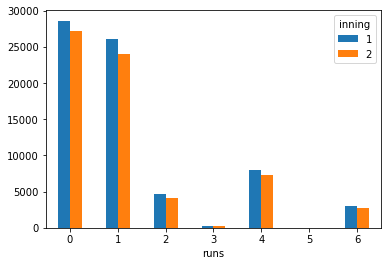

In [14]:
data.groupby('inning')['runs'].value_counts(sort=False).unstack().T.plot.bar(rot=0);

## IPL seasons are held every year now let's look at our data and extract how many seasons and which year were they played?


In [15]:
data['year'] = data['date'].dt.year
data['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
136517    2008
136518    2008
136519    2008
136520    2008
136521    2008
Name: year, Length: 136522, dtype: int64

In [16]:
print('Number of seasons:', data['year'].nunique())
print('Seasons were played at years: ', data['year'].sort_values().unique())

Number of seasons: 9
Seasons were played at years:  [2008 2009 2010 2011 2012 2013 2014 2015 2016]


## Find out the total number of matches played in each season also find the total number of runs scored in each season.


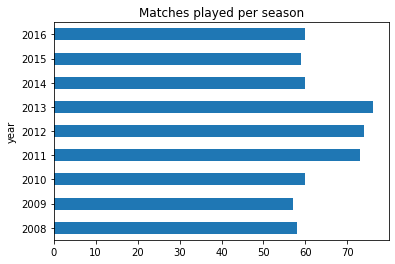

In [17]:
data.groupby('year')['match_code'].nunique().plot.barh(title='Matches played per season');

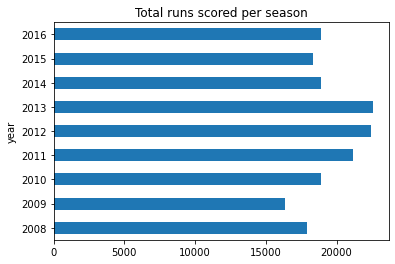

In [18]:
data.groupby('year')['total'].sum().plot.barh(title='Total runs scored per season');

In [19]:
# Average runs per match
data.groupby('match_code')['total'].sum().mean()

303.9272097053726

## There are teams which are high performing and low performing. Let's look at the aspect of performance of an individual team. Filter the data and aggregate the runs scored by each team. Display top 10 results which are having runs scored over 200.

In [20]:
total_scores = data.groupby(['match_code', 'inning', 'batting_team'])['total'].sum().reset_index()
high_scores = total_scores[total_scores['total'] >= 200]
high_scores.nlargest(10, columns='total')

,match_code,inning,batting_team,total
701,598027,1,Royal Challengers Bangalore,263
1118,980987,1,Royal Challengers Bangalore,248
292,419137,1,Chennai Super Kings,246
2,335983,1,Chennai Super Kings,240
1002,829795,1,Royal Challengers Bangalore,235
472,501260,1,Kings XI Punjab,232
398,501223,1,Delhi Daredevils,231
851,733987,1,Kings XI Punjab,231
1038,980907,1,Royal Challengers Bangalore,227
911,734047,1,Kings XI Punjab,226


## Chasing a 200+ target is difficulty in T-20 format. What are the chances that a team scoring runs above 200 in their 1st inning is chased by the opposition in 2nd inning.


In [21]:
# Inning 1 team must score 200+ scores
high_scores_1 = high_scores.loc[high_scores['inning']==1, :]
high_scores_1.head()

,match_code,inning,batting_team,total
0,335982,1,Kolkata Knight Riders,222
2,335983,1,Chennai Super Kings,240
14,335989,1,Chennai Super Kings,208
16,335990,1,Deccan Chargers,214
64,336014,1,Kolkata Knight Riders,204


In [22]:
# Slice 2nd inning matches similar to the match code of 200+ scored inning 1
high_scores_2 = total_scores.loc[total_scores['inning']==2, :]
high_scores_2 = high_scores_2.loc[high_scores_2['match_code'].isin(high_scores_1['match_code'].values), :]
high_scores_2.head()

,match_code,inning,batting_team,total
1,335982,2,Royal Challengers Bangalore,82
3,335983,2,Kings XI Punjab,207
15,335989,2,Mumbai Indians,202
17,335990,2,Rajasthan Royals,217
65,336014,2,Deccan Chargers,181


In [23]:
high_scoring_matches = high_scores_1.merge(high_scores_2, on='match_code', suffixes=['_inn1', '_inn2']).drop(columns=['inning_inn1', 'inning_inn2'])
high_scoring_matches

,match_code,batting_team_inn1,total_inn1,batting_team_inn2,total_inn2
0,335982,Kolkata Knight Riders,222,Royal Challengers Bangalore,82
1,335983,Chennai Super Kings,240,Kings XI Punjab,207
2,335989,Chennai Super Kings,208,Mumbai Indians,202
3,335990,Deccan Chargers,214,Rajasthan Royals,217
4,336014,Kolkata Knight Riders,204,Deccan Chargers,181
5,336019,Kings XI Punjab,221,Rajasthan Royals,180
6,336033,Rajasthan Royals,211,Chennai Super Kings,201
7,392210,Rajasthan Royals,211,Kings XI Punjab,133
8,419107,Mumbai Indians,212,Rajasthan Royals,208
9,419112,Kings XI Punjab,203,Royal Challengers Bangalore,204


In [24]:
high_scoring_matches['is_chased'] = high_scoring_matches['total_inn2'] > high_scoring_matches['total_inn1']
high_scoring_matches

,match_code,batting_team_inn1,total_inn1,batting_team_inn2,total_inn2,is_chased
0,335982,Kolkata Knight Riders,222,Royal Challengers Bangalore,82,False
1,335983,Chennai Super Kings,240,Kings XI Punjab,207,False
2,335989,Chennai Super Kings,208,Mumbai Indians,202,False
3,335990,Deccan Chargers,214,Rajasthan Royals,217,True
4,336014,Kolkata Knight Riders,204,Deccan Chargers,181,False
5,336019,Kings XI Punjab,221,Rajasthan Royals,180,False
6,336033,Rajasthan Royals,211,Chennai Super Kings,201,False
7,392210,Rajasthan Royals,211,Kings XI Punjab,133,False
8,419107,Mumbai Indians,212,Rajasthan Royals,208,False
9,419112,Kings XI Punjab,203,Royal Challengers Bangalore,204,True


In [25]:
chances = high_scoring_matches['is_chased'].value_counts(normalize=True).multiply(100).round(2)[1]
print('Chances of chasing 200+ target is', chances)

Chances of chasing 200+ target is 14.63


## Every season has that one team which is outperforming others and is in great form. Which team has the highest win counts in their respective seasons ?



In [26]:
match_wise_data = data.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)

match_wise_data.groupby('year').apply(
    lambda group: pd.Series(
        [group['winner'].value_counts().index[0], group['winner'].value_counts()[0]], index=['winner', 'count']
    )
)

,winner,count
year,,
2008,Rajasthan Royals,13
2009,Delhi Daredevils,10
2010,Mumbai Indians,11
2011,Chennai Super Kings,11
2012,Kolkata Knight Riders,12
2013,Mumbai Indians,13
2014,Kings XI Punjab,12
2015,Chennai Super Kings,10
2016,Sunrisers Hyderabad,11
